In [1]:
from text_to_speech import *

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
MODEL_FILE_PATH = './model/single_speaker_tts_best.pt'

text_to_speech = TextToSpeech(torch.load(MODEL_FILE_PATH), device)

In [5]:
mel_pred, enc_attention, dec_attention, attention = text_to_speech.tts('다람쥐와 호랑이')

text_to_speech.save_tts_result('./audio_sample/tts_sample.wav')

Saved wav!
path: ./audio_sample/tts_sample.wav


In [ ]:
text_to_speech.plot_attention_weights()

In [8]:
# attention[0][0]

tensor([[0.0476, 0.0476, 0.0476,  ..., 0.0476, 0.0476, 0.0476],
        [0.0476, 0.0476, 0.0476,  ..., 0.0476, 0.0476, 0.0476],
        [0.0476, 0.0476, 0.0476,  ..., 0.0476, 0.0476, 0.0476],
        ...,
        [0.0476, 0.0476, 0.0476,  ..., 0.0476, 0.0476, 0.0476],
        [0.0476, 0.0476, 0.0476,  ..., 0.0476, 0.0476, 0.0476],
        [0.0476, 0.0476, 0.0476,  ..., 0.0476, 0.0476, 0.0476]],
       device='cuda:0')

In [ ]:
text_to_speech

In [ ]:
text_tokens = tokenize(normalize_text('@'+text+'|'), as_id=True)
text_tokens = torch.LongTensor(text_tokens).unsqueeze(0).to(self.device)
text_tokens_mask = self.transformer.create_padding_mask(text_tokens)
with torch.no_grad():
    text_encd = self.transformer.encoder(text_tokens, text_tokens_mask)

In [8]:
import configs as cf
from preprocess import *
from train_tts import *

In [9]:
# Set Dataset
full_ds = get_single_speaker_dataset(
    cf.SPEAKER, cf.WAV_PATH, cf.SCRIPT_FILE_NAME,
    cf.SR, cf.N_MELS, cf.N_FFT, cf.HOP_LENGTH, cf.WIN_LENGTH
)

# Split train, valid
data_length = len(full_ds)
train_ds_len = int(data_length*cf.TRAINSET_RATIO)
valid_ds_len = data_length - train_ds_len
train_ds, valid_ds = random_split(full_ds, [train_ds_len, valid_ds_len])

# Set DataLoader
train_dl = get_dl_by_ds(train_ds, cf.BATCH_SIZE, cf.DL_NUM_WORKERS, shuffle=True)
valid_dl = get_dl_by_ds(valid_ds, cf.BATCH_SIZE, cf.DL_NUM_WORKERS, shuffle=False)

Loading ['여1_소설1', '여1_자기계발2', '여1_동화1', '여1_자기계발1'] ...
소설1 Done!
자기계발2 Done!
동화1 Done!
자기계발1 Done!


In [10]:
batch = iter(train_dl).next()

In [11]:
model = torch.load(MODEL_FILE_PATH).to(device)

In [13]:
tensor_dict_to_device(batch, device)
text_tokens, mel = batch['text_tokens'], batch['mel']
now_batch_len = len(mel)
mel_pred, _, enc_attention, dec_attention, attention = model(text_tokens, mel[:,:-1])
mel_pred_batch = mel_pred.cpu().detach().numpy()

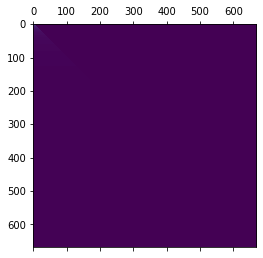

In [21]:
import matplotlib.pyplot as plt
plt.matshow(dec_attention[0][0].detach().cpu().numpy())

In [24]:
attention[0][0]

tensor([[0.0294, 0.0294, 0.0294,  ..., 0.0000, 0.0000, 0.0000],
        [0.0294, 0.0294, 0.0294,  ..., 0.0000, 0.0000, 0.0000],
        [0.0294, 0.0294, 0.0294,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0294, 0.0294, 0.0294,  ..., 0.0000, 0.0000, 0.0000],
        [0.0294, 0.0294, 0.0294,  ..., 0.0000, 0.0000, 0.0000],
        [0.0294, 0.0294, 0.0294,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [14]:
def save_tts_result(mel_pred, save_file_path):
    mel_pred = mel_pred.T
    mel_pred = (np.clip(mel_pred, 0, 1) * cf.MAX_DB) - cf.MAX_DB + cf.REF_DB
    inversed = librosa.feature.inverse.mel_to_audio(
        mel_pred, sr=cf.SR, hop_length=cf.HOP_LENGTH, win_length=cf.WIN_LENGTH)

    sf.write(save_file_path, inversed, cf.SR)
    print(f'Saved tts result!\npath: {save_file_path}')

    
i = 5
mel_pred = mel_pred_batch[i]
save_tts_result(mel_pred, './audio_sample/tts_sample_by_dl.wav')
''.join([cf.id_to_char[_] for _ in text_tokens[i].detach().cpu().numpy()])

In [12]:
S = batch['mel'][5].detach().cpu().numpy().T

In [13]:
import librosa
import librosa.display

def show_mel(mel):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), y_axis='mel', sr=cf.SR, hop_length=cf.HOP_LENGTH, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.show()

In [14]:
i = 5

mel_true = batch['mel'][i].detach().cpu().numpy().T
mel_pred = mel_pred_batch[i]

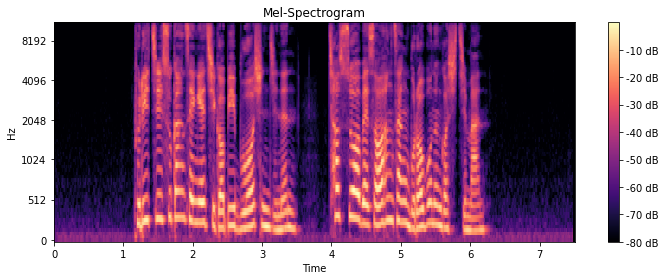

In [15]:
show_mel(mel_true)

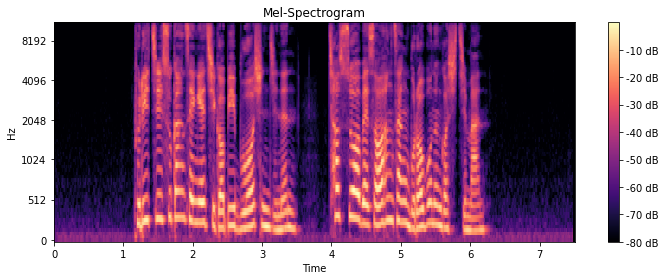

In [16]:
show_mel(mel_pred)

In [ ]:
 save_file_path):
        sf.write(save_file_path, wav, cf.SR)
        print(f'Saved wav!\npath: {save_file_path}')

In [45]:
attn_tmp = attention[0][0].detach().cpu().numpy()
sum(attn_tmp[0])

1.0000000447034836

In [12]:
attention.shape

torch.Size([8, 8, 444, 79])

In [13]:
attn_tmp = attention[0].detach().cpu()

In [14]:
import matplotlib.pyplot as plt
import torchvision
from torchvision.utils import make_grid

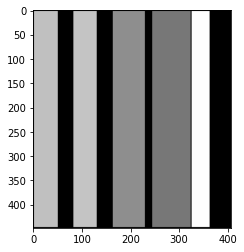

In [15]:
attention.shape
attn_tmp = attention[:5, :1, ...].detach().cpu()
plt.imshow(make_grid(attn_tmp, normalize=True).permute(1,2,0))

In [65]:
writer = SummaryWriter('./logs/tmp/')

x = make_grid(attention[0]*255)

writer.add_image('Attention_%d_0'%123, x, 456)

TypeError: Cannot handle this data type: (1, 1, 8), |u1